In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [3]:
# set constraints
pd.set_option('display.max_columns', None)

 # 1.0.0 Data

## 1.1.0 Read Data

In [3]:
# Read Excel file
df = pd.read_excel("WA_Fn-UseC_-HR-Employee-Attrition.xlsx", engine="openpyxl")

In [6]:
# Check random 5 rows
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
950,31,No,Non-Travel,587,Sales,2,4,Life Sciences,1,1324,4,Female,57,3,3,Sales Executive,3,Divorced,9852,8935,1,Y,Yes,19,3,1,80,1,10,5,2,10,8,9,6
1223,47,Yes,Travel_Frequently,1093,Sales,9,3,Life Sciences,1,1716,3,Male,82,1,4,Sales Executive,3,Married,12936,24164,7,Y,No,11,3,3,80,0,25,3,1,23,5,14,10
787,55,No,Travel_Frequently,1091,Research & Development,2,1,Life Sciences,1,1096,4,Male,65,3,3,Manufacturing Director,2,Married,10976,15813,3,Y,No,18,3,2,80,1,23,4,3,3,2,1,2
128,22,No,Travel_Rarely,594,Research & Development,2,1,Technical Degree,1,169,3,Male,100,3,1,Laboratory Technician,4,Married,2523,19299,0,Y,No,14,3,3,80,1,3,2,3,2,1,2,1
1383,36,No,Non-Travel,1351,Research & Development,9,4,Life Sciences,1,1949,1,Male,66,4,1,Laboratory Technician,2,Married,2810,9238,1,Y,No,22,4,2,80,0,5,3,3,5,4,0,2
788,28,No,Travel_Rarely,857,Research & Development,10,3,Other,1,1097,3,Female,59,3,2,Research Scientist,3,Single,3660,7909,3,Y,No,13,3,4,80,0,10,4,4,8,7,1,7
1008,54,No,Travel_Rarely,971,Research & Development,1,3,Medical,1,1422,4,Female,54,3,4,Research Director,4,Single,17328,5652,6,Y,No,19,3,4,80,0,29,3,2,20,7,12,7
255,25,No,Travel_Rarely,685,Research & Development,1,3,Life Sciences,1,350,1,Female,62,3,2,Manufacturing Director,3,Married,4898,7505,0,Y,No,12,3,4,80,2,5,3,3,4,2,1,2
1039,34,Yes,Travel_Rarely,1107,Human Resources,9,4,Technical Degree,1,1467,1,Female,52,3,1,Human Resources,3,Married,2742,3072,1,Y,No,15,3,4,80,0,2,0,3,2,2,2,2
719,47,No,Travel_Rarely,955,Sales,4,2,Life Sciences,1,1003,4,Female,83,3,2,Sales Executive,4,Single,4163,8571,1,Y,Yes,17,3,3,80,0,9,0,3,9,0,0,7


## 1.2.0 EDA & Basic Data Preprocessing

### 1.2.1 Check NA's values & Identifiers

In [6]:
nan_in_df = df.isnull().sum().any()
 
nan_in_df

False

In [11]:
# Checking for uniqueness
is_unique = df['EmployeeNumber'].is_unique
is_unique

True

The dataframe has been checked and confirmed to have no missing values (NA values), indicating that the dataset is complete and ready for analysis without the need for further data cleaning to address missing entries. And the column "EmployeeNumber" is a unique identifier, we should drop it before data preprocessing.

### 1.2.2 Check Column Type

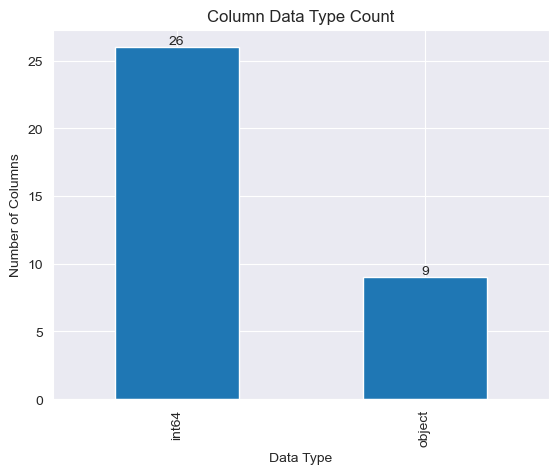

In [7]:
# Count the number of columns for each dtype
dtype_counts = df.dtypes.value_counts()

# Plot
dtype_counts.plot(kind='bar')
plt.xlabel('Data Type')
plt.ylabel('Number of Columns')
plt.title('Column Data Type Count')

# Annotate each bar with the count of the data type
for index, value in enumerate(dtype_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
plt.show()

The dataset comprises a total of 35 columns, with 26 of these being integer (int64) variables and 9 being categorical variables. This composition aligns with the provided description of the raw data, indicating that the dataset includes a mix of numerical and categorical information suitable for analysis.

### 1.2.3 Numerical Features

In [8]:
# Statistic value analysis
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In our analysis, we found that the variables EmployeeCount and StandardHours consistently hold the values of 1 and 80, respectively. This consistency suggests these variables do not vary and, therefore, are unlikely to provide meaningful insights for future research. As such, it is recommended that they be excluded from further analysis.
<br>
Given that Attrition is a categorical variable, converting it into a binary column will enhance our ability to conduct numerical feature analysis. This transformation will simplify the process of integrating Attrition data into quantitative analyses, allowing for more straightforward interpretation and evaluation of its impact.

In [9]:
# Dropping 'EmployeeCount' and 'StandardHours' columns
df = df.drop(['EmployeeCount', 'StandardHours'], axis=1)

# Encode 'Attrition' as a binary variable
df['Attrition_binary'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

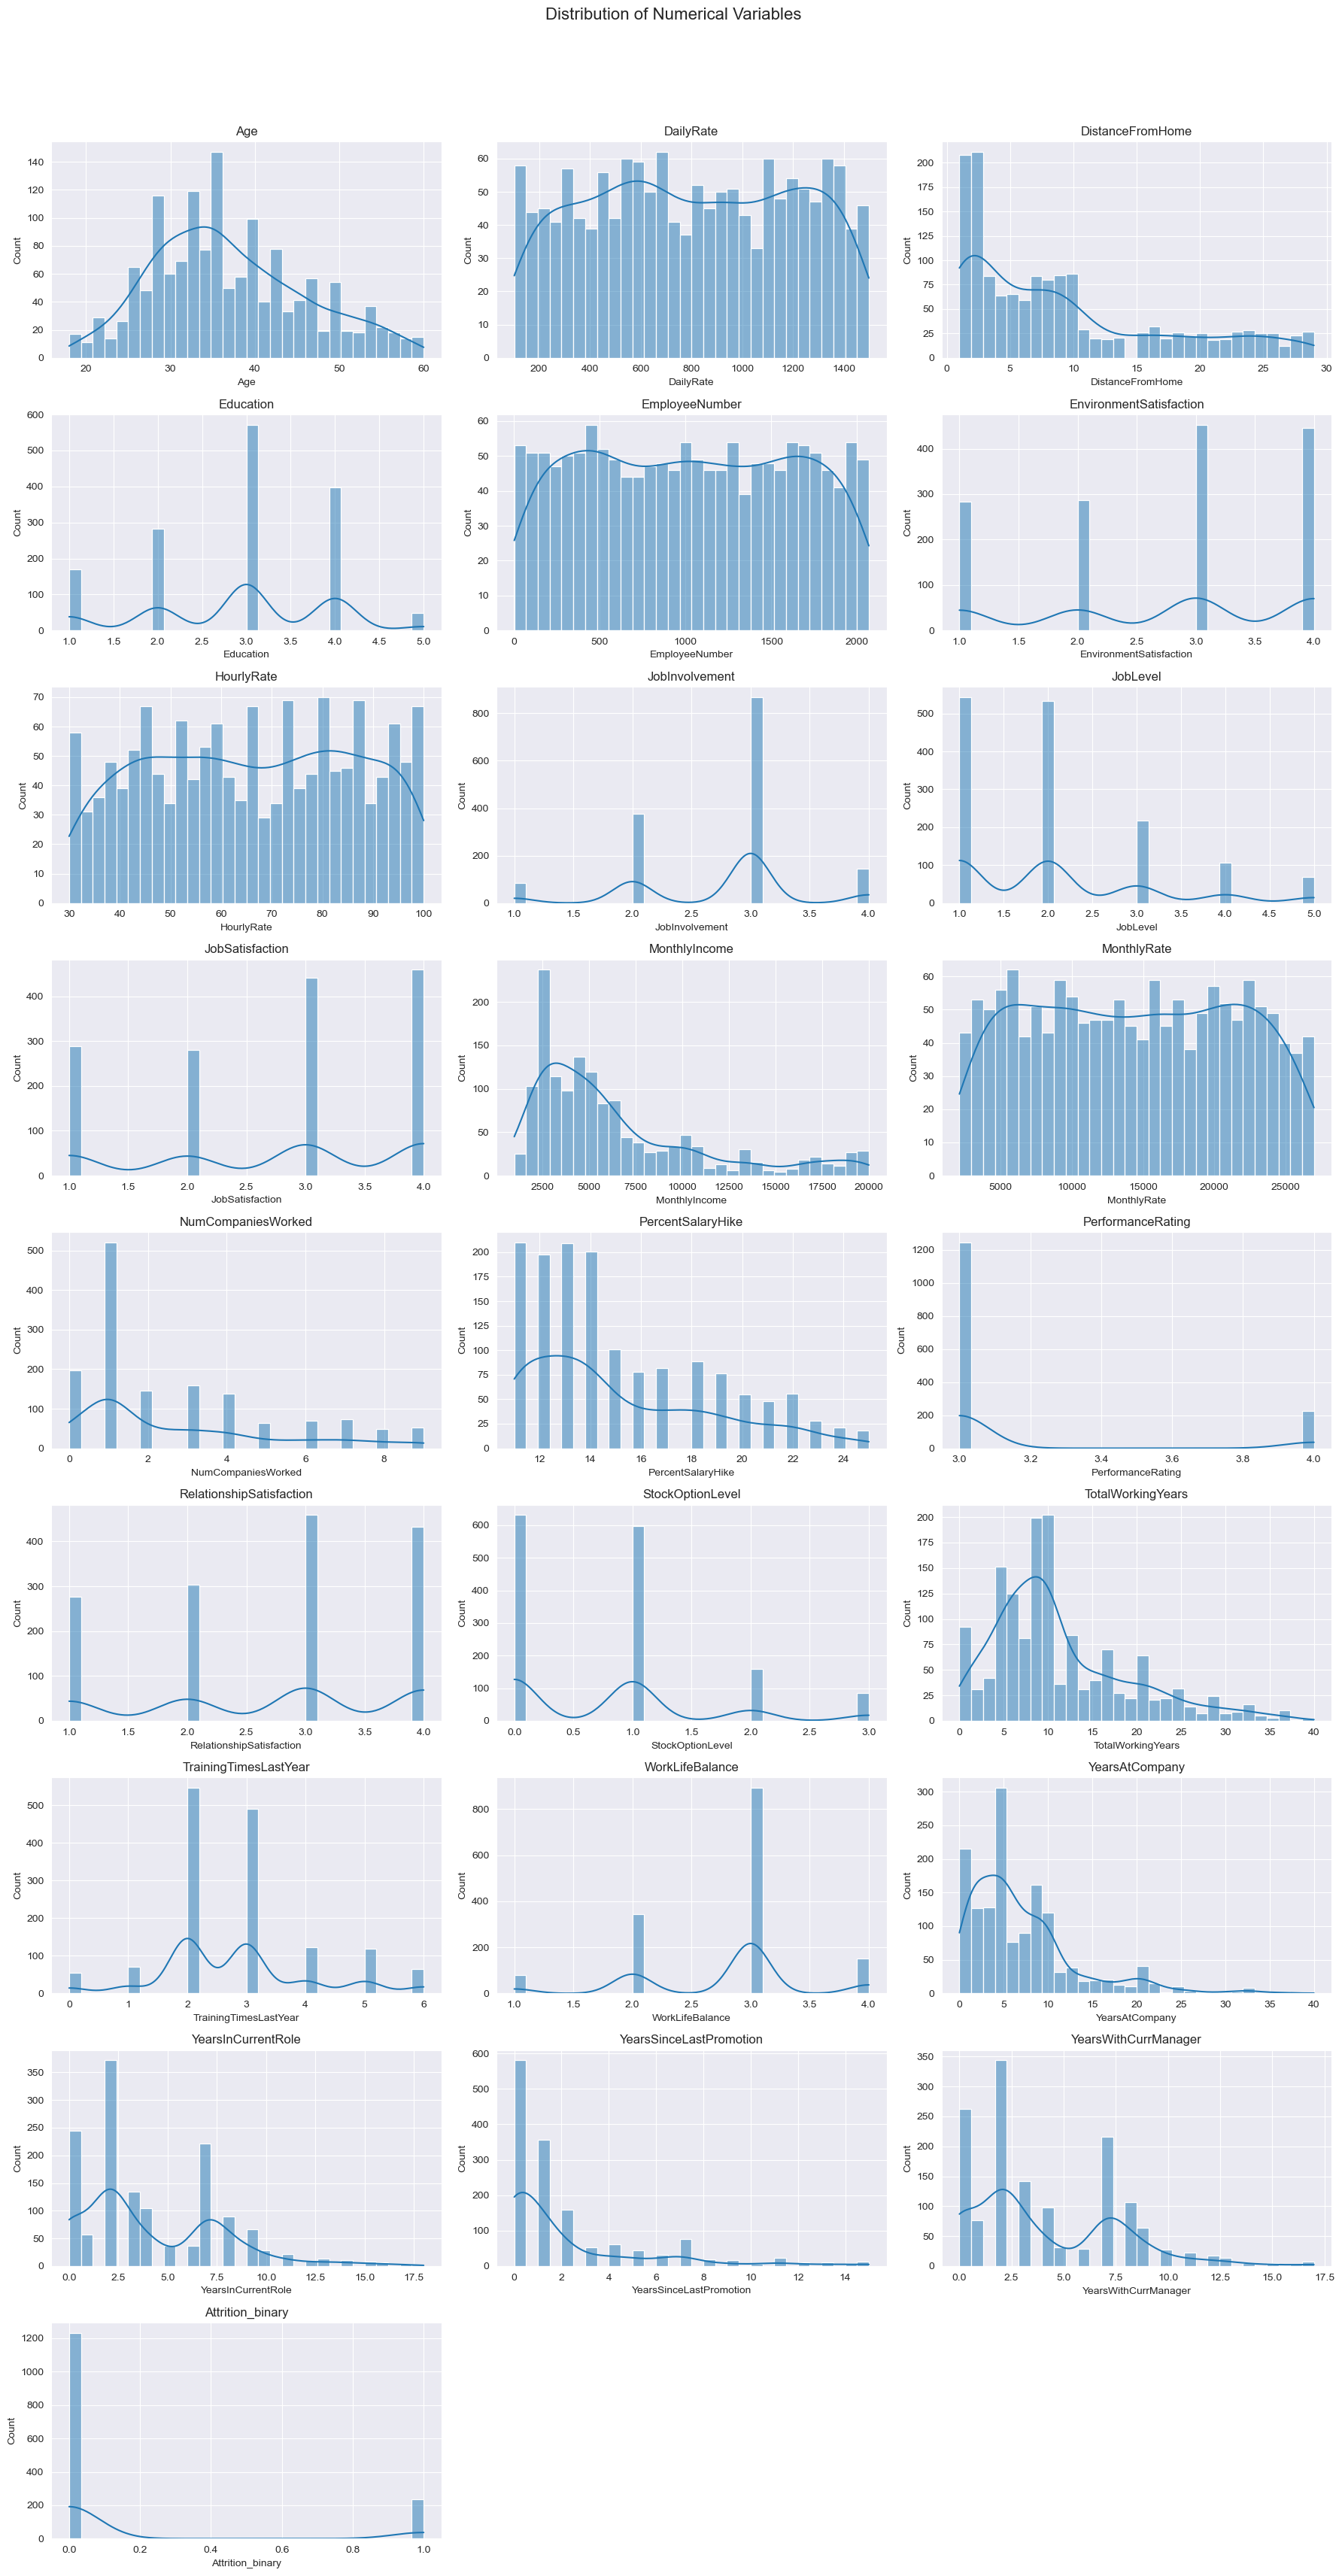

In [10]:
# Plotting distributions for all numerical variables to check for outliers and noise
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns

# Setting up the plotting area
n_rows = len(numerical_variables) // 3 + (len(numerical_variables) % 3 > 0)
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

for i, var in enumerate(numerical_variables):
    row = i // 3
    col = i % 3
    sns.histplot(df[var], kde=True, ax=axes[row, col], bins=30)
    axes[row, col].set_title(var)

# Adjust layout to prevent overlap and remove empty subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
if len(numerical_variables) % 3:
    for j in range(3 - len(numerical_variables) % 3):
        fig.delaxes(axes.flatten()[-(j + 1)])

plt.show()

Most variables display a variety of distribution shapes, including normal-like distributions (e.g., Age), skewed distributions (e.g., TotalWorkingYears, YearsAtCompany), and distributions with clear peaks (e.g., Education).
<br>
Several variables exhibit potential outliers. For instance, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrManager show long tails, suggesting the presence of employees with unusually high values compared to the rest.
<br>
Noisiness and Type of Noise:

* Stochastic Noise: The variability seen in variables like DailyRate, HourlyRate, and MonthlyRate appears stochastic, reflecting natural fluctuations in compensation rates.
* Rounding Errors: There's no clear indication of rounding errors from these plots; most continuous variables show smooth distributions without unnatural spikes that would suggest rounding.

Some variables, like DistanceFromHome, exhibit bimodal or multimodal tendencies, suggesting the presence of distinct groups within the workforce, possibly based on geographic or departmental segmentation.
<br>
Observing the distributions and characteristics of the numerical values, it's evident that some variables, despite being numerical in format, might actually represent categorical information due to their discrete nature and limited range of values. These variables include:
* Education: Typically represented on a scale (e.g., 1 for 'Below College', 2 for 'College', 3 for 'Bachelor', etc.), indicating different levels of educational attainment, which makes it a categorical variable encoded as numerical.
* EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, and WorkLifeBalance: These variables are likely measured on a Likert scale (e.g., from 1 to 4 or 1 to 5), where each number represents a level of satisfaction or engagement, categorizing them as ordinal variables.
* JobLevel: Indicates a hierarchical position within the company, where higher numbers represent higher positions. Despite being numeric, the discrete levels act as categories.
* StockOptionLevel: Represents the level of stock options provided to employees, which is categorical as it describes different predefined groups of stock option benefits.
* TrainingTimesLastYear: Counts the number of training sessions attended, which could be considered categorical if there are only a few distinct, commonly occurring values, representing different training groups.

These variables are encoded as integers but represent ordered categories, making them ordinal categorical variables. Their discrete and limited nature suggests that analyses should treat them as categories, which can provide insights into group differences or trends that might not be apparent when treating them purely as numeric.

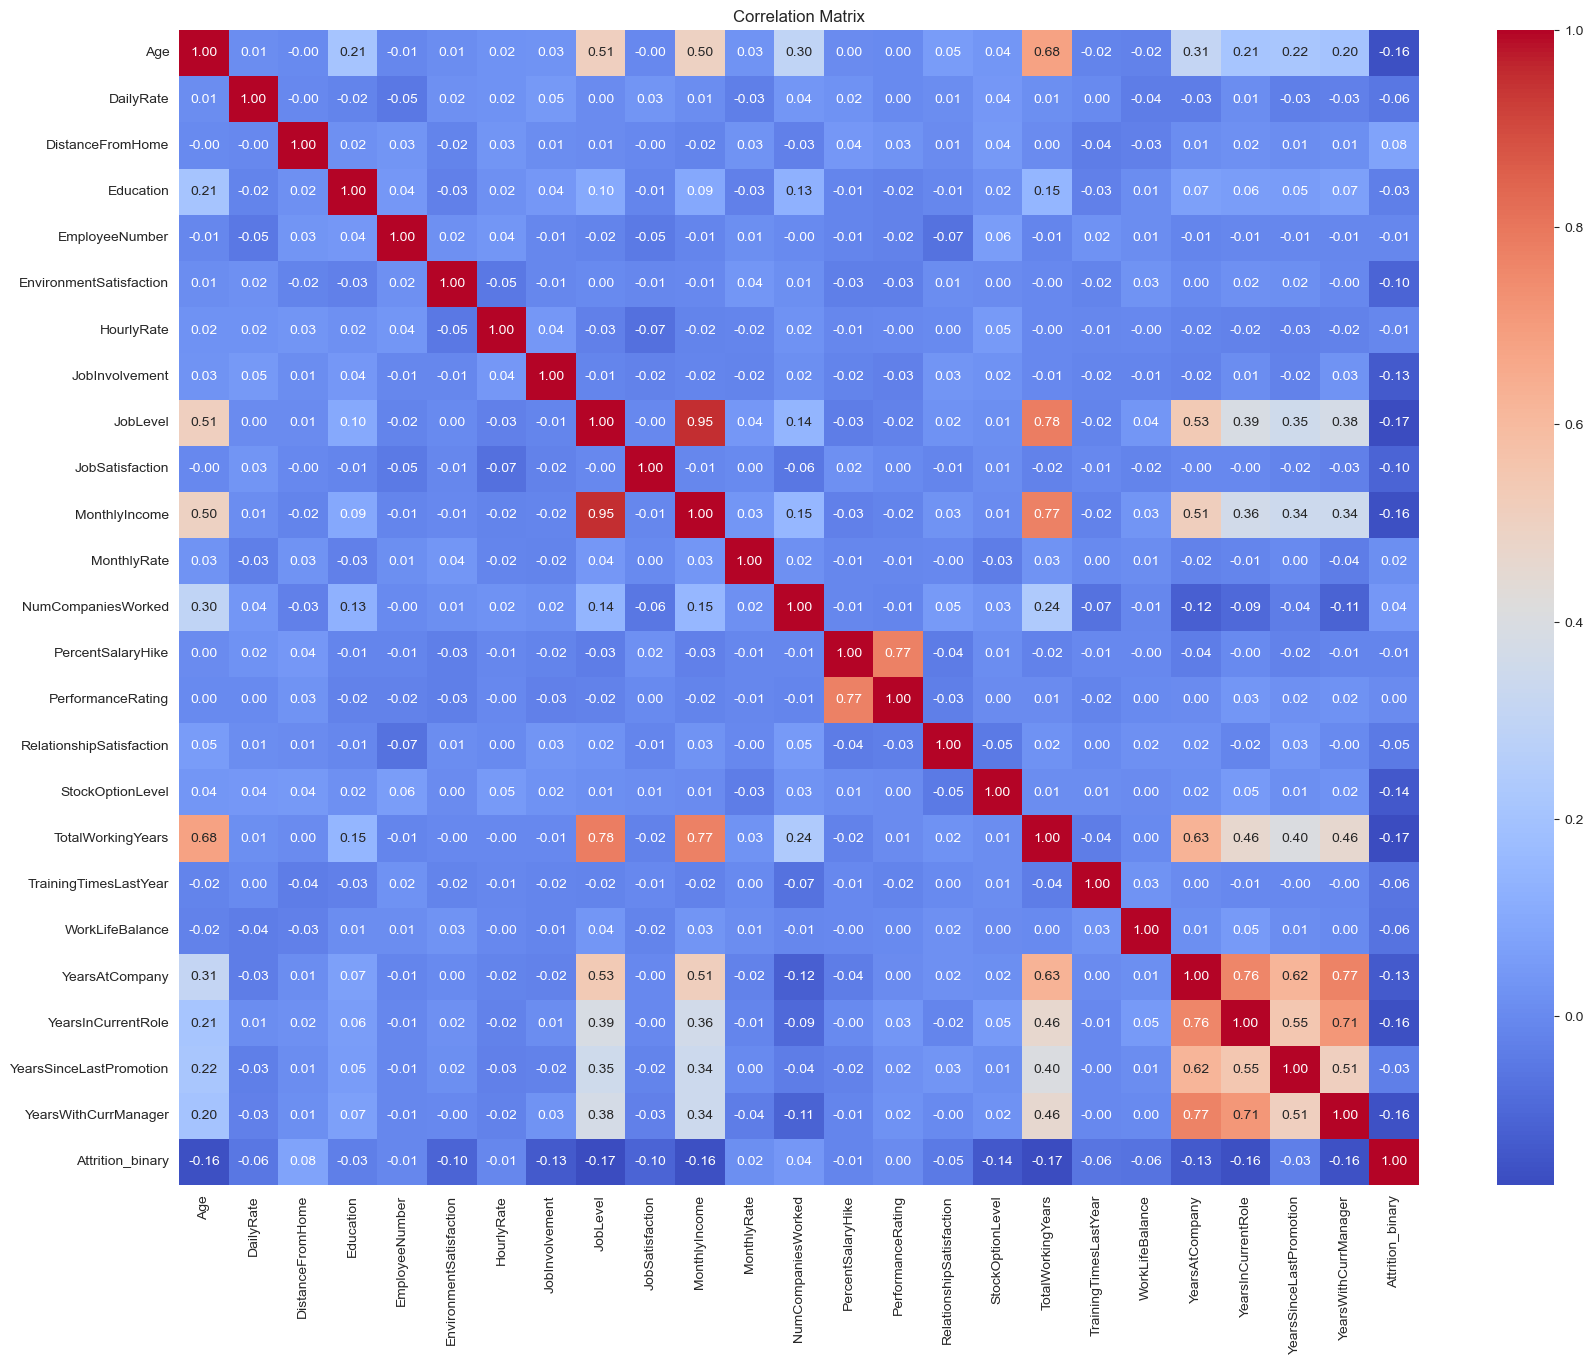

In [11]:
# Calculating the correlation matrix 
correlation_matrix_dropped = df.select_dtypes(include=['int64', 'float64']).corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix_dropped, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The heatmap above displays the correlation matrix for all numerical variables in the dataset. Each cell in the heatmap shows the correlation coefficient between two variables, ranging from -1 to 1. A coefficient close to 1 indicates a strong positive correlation, meaning that as one variable increases, the other tends to increase as well. Conversely, a coefficient close to -1 indicates a strong negative correlation, where an increase in one variable is associated with a decrease in the other. Coefficients around 0 suggest little to no linear relationship.
<br>
Key observations regarding the correlation with Attrition_binary include:
* Variables like TotalWorkingYears, JobLevel, and Age have notable negative correlations with attrition, reinforcing the idea that more experienced and older employees are less likely to leave.
* DistanceFromHome and NumCompaniesWorked show positive correlations with attrition, suggesting factors such as commute distance and a history of working for multiple companies may contribute to an employee's likelihood of leaving.

Several notable interactions between variables, aside from their relationship with attrition:
* Age and Total Working Years: A strong positive correlation indicates that, as expected, older employees tend to have more working years. This relationship is intuitive and highlights career progression.
* Job Level and Monthly Income: There's a significant positive correlation, suggesting that higher job levels are associated with higher monthly incomes. This reflects the typical organizational structure where positions at higher levels command greater compensation.
* Years at Company and Several Other Variables: Years at the company shows strong positive correlations with variables like YearsInCurrentRole, YearsWithCurrManager, and YearsSinceLastPromotion. These correlations suggest that employees who have been at the company longer tend to have spent more time in their current role, with their current manager, and it has been longer since their last promotion. This could indicate career stability but might also suggest potential areas for improving career development pathways to prevent stagnation.
* Total Working Years and Job Level: The positive correlation here indicates that employees with more total working years tend to have higher job levels, suggesting a progression in their careers over time.
* Monthly Income and Several Variables: Monthly income shows strong positive correlations with TotalWorkingYears, JobLevel, and Age. These relationships underscore the impact of experience, position, and age on compensation.
* NumCompaniesWorked and Age: A slight positive correlation suggests that, on average, older employees have worked for more companies. This could reflect career exploration or changes over an individual's working life.

To study further, we will do a detailed EDA to check the correlations with Attrition

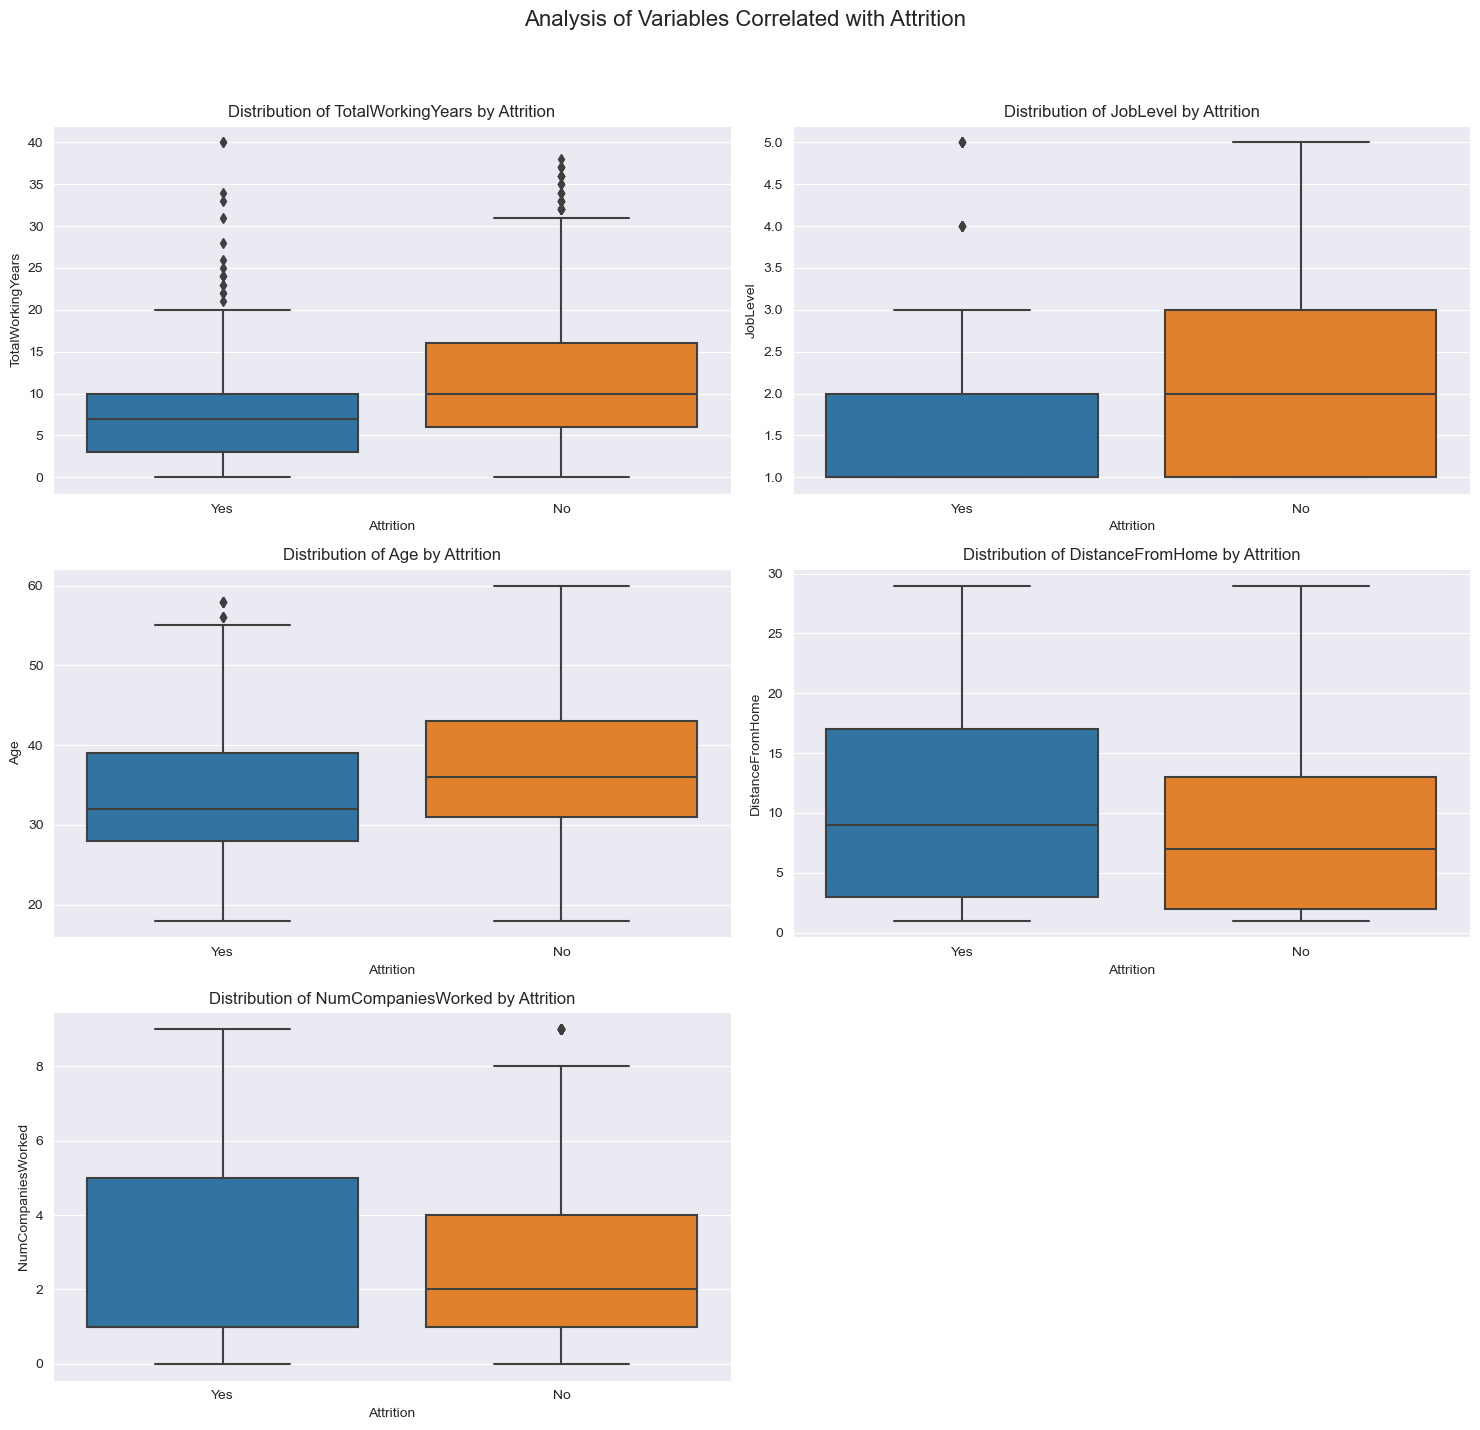

In [12]:
# Check correlated variables with Attrition

# Setting up the plotting area
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Analysis of Variables Correlated with Attrition', fontsize=16)

# Plotting distributions of selected variables against Attrition
variables_to_plot = ['TotalWorkingYears', 'JobLevel', 'Age', 'DistanceFromHome', 'NumCompaniesWorked']
attrition_status = ['Yes', 'No']

for i, var in enumerate(variables_to_plot):
    row = i // 2
    col = i % 2
    sns.boxplot(ax=axes[row, col], x='Attrition', y=var, data=df)
    axes[row, col].set_title(f'Distribution of {var} by Attrition')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Removing the empty subplot (if any)
if len(variables_to_plot) % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.show()

The boxplot visualizations provide a detailed view of how the selected variables correlate with attrition:

* TotalWorkingYears: Employees who have left the company tend to have fewer total working years compared to those who stayed, indicating that individuals with more experience or tenure are less likely to leave.

* JobLevel: Similarly, employees at higher job levels are less likely to have left the company. This suggests that higher positions, which likely come with better compensation and job satisfaction, are associated with lower attrition rates.

* Age: The age distribution shows that younger employees are more likely to leave than older ones. This could be due to various factors, including career exploration, seeking better opportunities, or less attachment to the organization.

* DistanceFromHome: Employees who live further from work are more likely to leave the company. The commute might be a significant factor in their decision to leave, possibly due to the stress and time associated with long commutes.

* NumCompaniesWorked: There's a noticeable trend where employees who have worked at more companies are also more likely to leave. This could indicate a pattern of job-hopping or a preference for change, suggesting these employees may be less inclined to long-term commitments to a single employer.

### 1.2.4 Categorical Features

In [13]:
# Converting the identified potential categorical variables from 1.2.3 to categorical
categorical_vars = [
    'Education',
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobSatisfaction',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'WorkLifeBalance',
    'JobLevel',
    'StockOptionLevel',
    'TrainingTimesLastYear'
]

for var in categorical_vars:
    df[var] = df[var].astype('category')

In [14]:
# Adding original categorical variables for comparison
original_categorical_vars = ['Department', 'BusinessTravel', 'Gender', 'MaritalStatus', 'Over18', 'OverTime','EducationField',
    'JobRole',]
all_categorical_vars = categorical_vars + original_categorical_vars

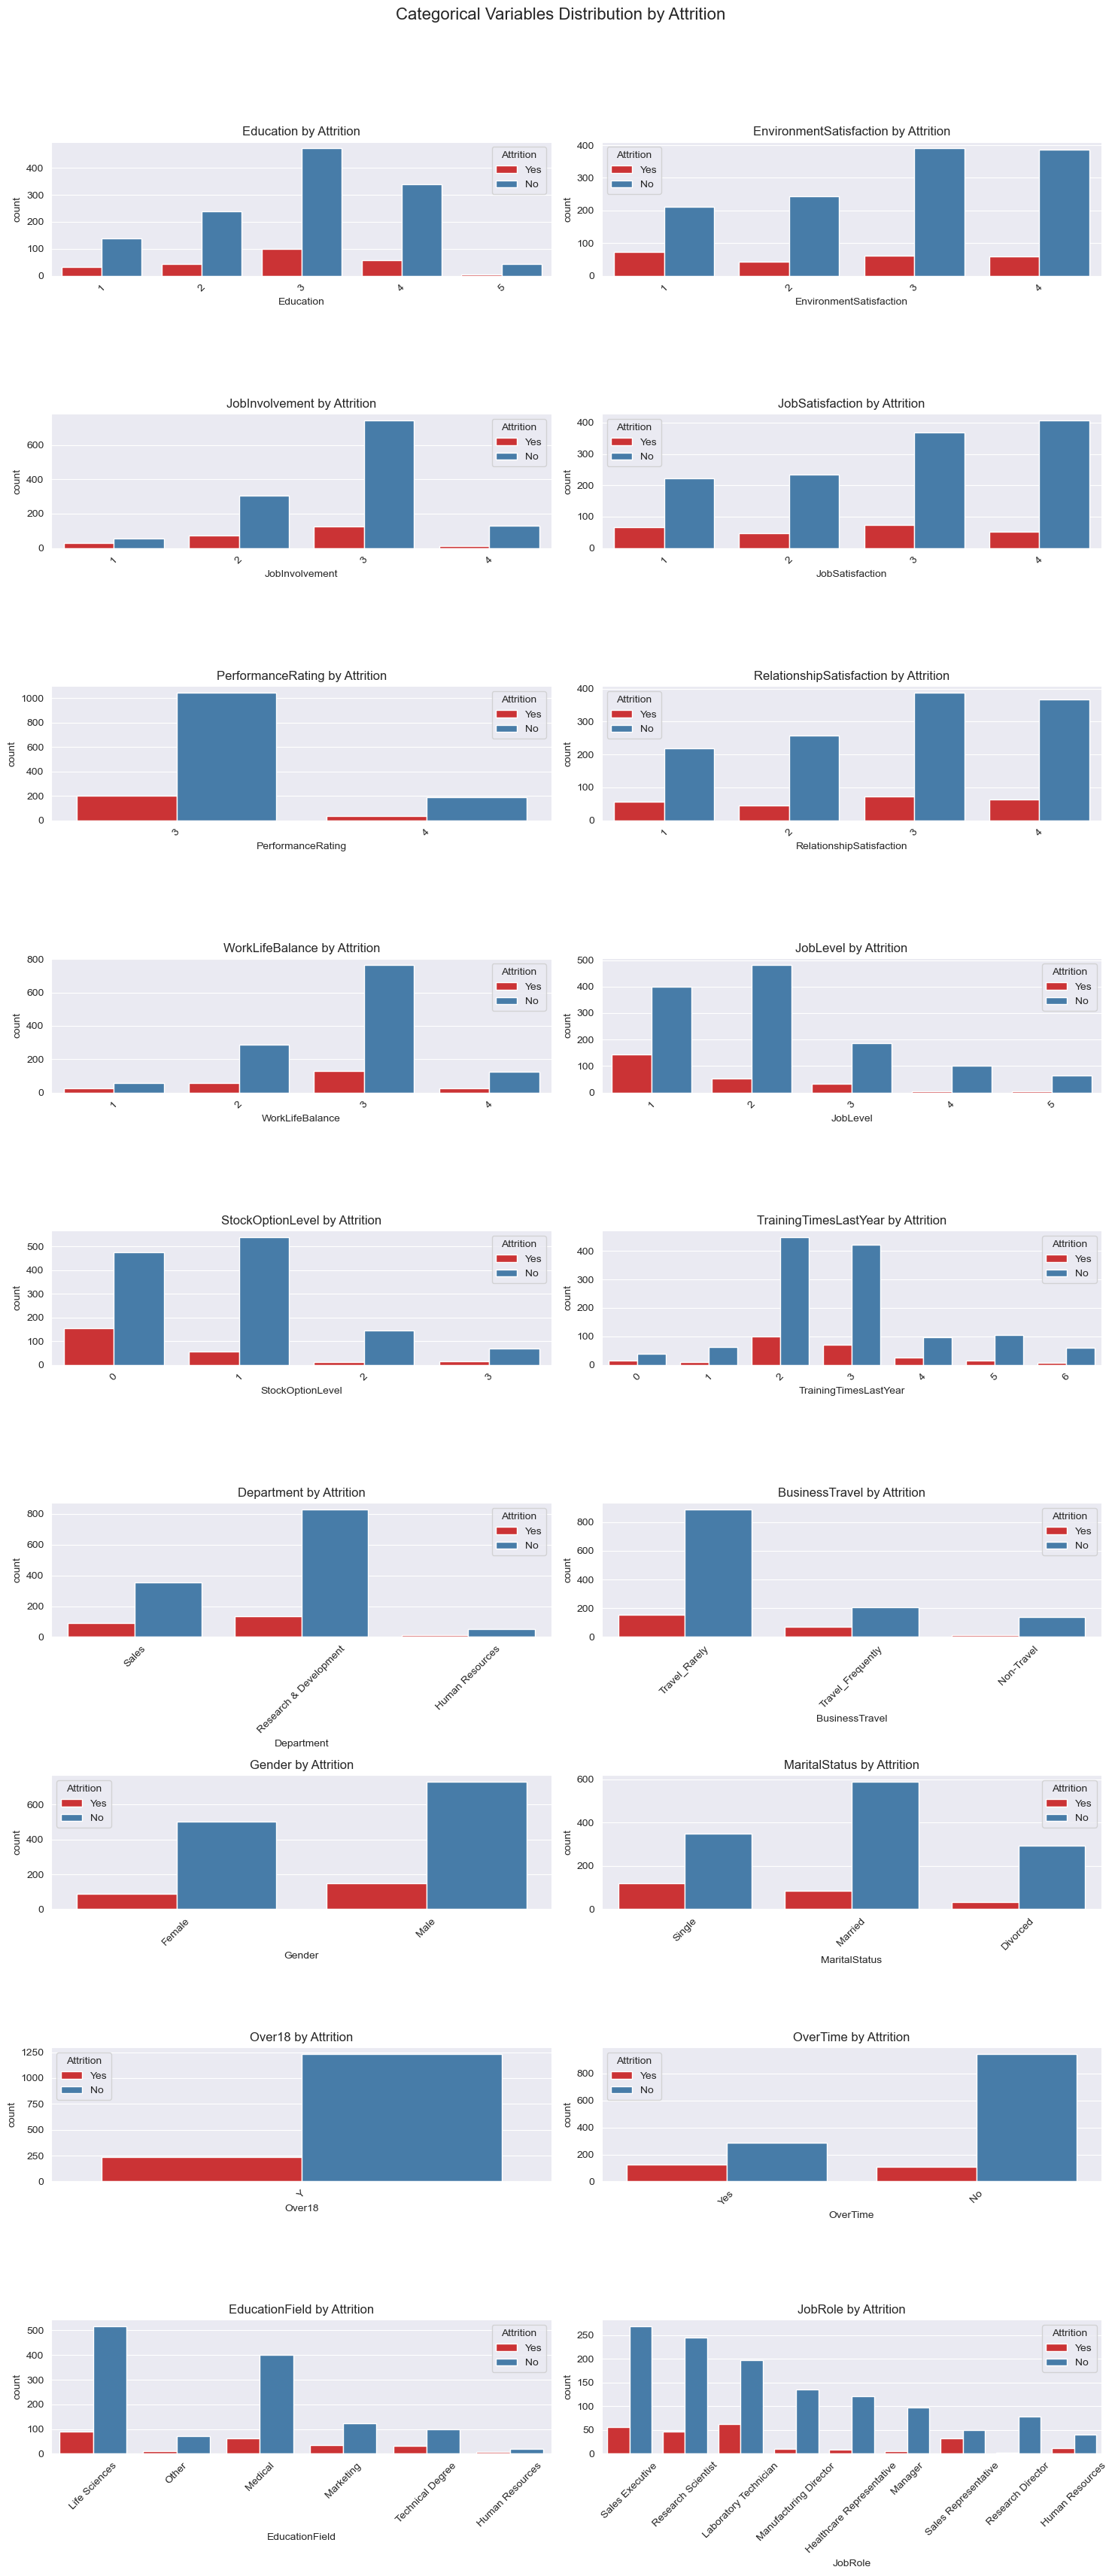

In [15]:
# Setting up the plotting area for categorical variables against Attrition
n_cat_vars = len(all_categorical_vars)
n_rows = n_cat_vars // 2 + (n_cat_vars % 2 > 0)
fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 4))
fig.suptitle('Categorical Variables Distribution by Attrition', fontsize=16)

for i, var in enumerate(all_categorical_vars):
    row = i // 2
    col = i % 2
    sns.countplot(ax=axes[row, col], x=var, hue='Attrition', data=df, palette="Set1")
    axes[row, col].set_title(f'{var} by Attrition')
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Removing the empty subplot if an odd number of categorical variables
if n_cat_vars % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.show()

The visualizations illustrate the distribution of both transformed and original categorical variables by attrition status, providing insights into how different categories may influence an employee's decision to leave:
* Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, etc.: These transformed categorical variables show varying distributions across their categories when split by attrition status. Certain levels of satisfaction (e.g., lower environment satisfaction) and involvement might be more associated with higher attrition rates.
* Department: The distribution suggests that attrition rates may vary across different departments, with some departments potentially experiencing higher turnover.
* BusinessTravel: Employees who travel frequently appear to have a higher attrition rate compared to those who travel less or not at all, indicating that travel demands may impact employee retention.
* Gender: The attrition distribution between genders offers insights into whether one gender may be more likely to leave than the other, although differences may not be pronounced.
* MaritalStatus: The attrition rates differ among single, married, and divorced employees, with single employees potentially showing higher attrition, suggesting marital status may play a role in an employee's likelihood to leave.
* Over 18: Only has one two-sided bar, indicating than every employee is over 18. We should drop it before building model.

### 1.2.5 VIF Analysis 

In [16]:
# Selecting numerical variables for multicollinearity analysis after transforming categorical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Adding a constant for the intercept
X = add_constant(df[numerical_vars])

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(0, X.shape[1])]

vif_data[1:]

,Variable,VIF
1,Age,2.005141
2,DailyRate,1.015706
3,DistanceFromHome,1.014292
4,EmployeeNumber,1.005897
5,HourlyRate,1.005781
6,MonthlyIncome,2.536239
7,MonthlyRate,1.008155
8,NumCompaniesWorked,1.249910
9,PercentSalaryHike,1.006563
10,TotalWorkingYears,4.644095


Multicollinearity analysis involves examining the correlation between independent variables in a dataset to identify variables that are highly correlated with each other. High multicollinearity can be problematic in regression models because it undermines the statistical significance of an independent variable.
<br>
All of the numerical variables in the dataset have Variance Inflation Factors (VIFs) below 10, indicating a low level of multicollinearity among them. This suggests that these variables are sufficiently independent for the purposes of regression modeling, mitigating concerns about multicollinearity adversely affecting the model's accuracy and reliability. Consequently, we can proceed with building the regression model without needing to exclude variables for multicollinearity reasons.

### 1.2.6 EDA Conclusion

The EDA suggests that both numerical and categorical variables in the dataset provide valuable insights into factors that may influence an employee's likelihood of leaving the company. 
<br>
Therefore, we will retain all variables for further analysis, except for the two columns, 'EmployeeCount' and 'StandardHours,' which were dropped as per section 1.2.3 due to their constant values. This decision ensures that our analysis incorporates a comprehensive range of variables, enhancing the potential for insightful findings, while also addressing data redundancy by excluding variables that do not contribute to variability in the dataset.

## 1.3.0 Data Preprocessing Prepared

In [4]:
# Read Excel file again to keep data intact and Drop the 'EmployeeCount' and 'StandardHours' mentioned in 1.2.3
df = pd.read_excel("WA_Fn-UseC_-HR-Employee-Attrition.xlsx", engine="openpyxl")

# Dropping 'EmployeeCount' and 'StandardHours' columns
df = df.drop(['EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18'], axis=1)

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

### 1.3.1 One-Hot Encoding

In [7]:
from projectpreprocessing import one_hot_encode
# ['Department', 'MaritalStatus', 'Gender', 'JobRole','EducationField', 'Attrition', 'OverTime', 'BusinessTravel'] # Nominal Variables (No Rank)
df_encoded_nominal = one_hot_encode(df)

In [8]:
df_encoded_nominal.head(5)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Attrition_Yes,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


### 1.3.2 Normalization - MinMaxScaler

In [9]:
from projectpreprocessing import min_max_scale

df_scaled = min_max_scale(df_encoded_nominal)

In [10]:
df_scaled.head(5)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Attrition_Yes,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### 1.3.3 PCA

In [11]:
from projectpreprocessing import apply_pca

df_pca = apply_pca(df_scaled, n_components=3)
df_pca["Attrition_Yes"] = df_pca["Attrition_Yes"].astype(int)

In [12]:
df_pca.head(5)

,PCA_Component_1,PCA_Component_2,PCA_Component_3,Attrition_Yes
0,1.123831,0.873382,-0.500620,1
1,-0.655207,-0.275314,-0.849583,0
2,-0.609494,0.785171,0.280207,1
3,-0.627980,-0.122207,-0.810467,0
4,-0.671009,-0.649347,0.715969,0


# 2.0.0 Models

## 2.1.0 Logistic Regression

### 2.1.1 Create naive logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score,f1_score


# Splitting the dataset into training and testing sets
X = df_scaled.drop('Attrition_Yes', axis=1)
y = df_scaled['Attrition_Yes']

# Initialize the naive model
naive_logistic_model = LogisticRegression(max_iter=100000, n_jobs=-1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify= y)

# Train the model
naive_logistic_model.fit(X_train, y_train)

# Predictions on training set for f-1 calculation
y_train_pred = naive_logistic_model.predict(X_train)

# Get the prediction
y_test_pred = naive_logistic_model.predict(X_test)

# Calculate f-1 score for both training and testing sets #TP/TP+FN
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

f1_train, f1_test

(0.5563380281690141, 0.5555555555555557)

### 2.1.2 Use Cross Validation & Grid Search to find the best parameter

In [14]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Stratified train-test split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

# Setting up the k-fold cross-validation (with StratifiedKFold for balanced splits)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=66)

# Defining the model with class weight parameter
log_reg = LogisticRegression(max_iter=10000) 

# Defining the grid of parameters to search over, including class_weight if needed
param_grid = {
    'C': [0.001, 0.002, 0.003, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': [None, 'balanced']  #  n_samples / (n_classes * np.bincount(y))
}

# Setting up the grid search with logistic regression, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(log_reg, param_grid, cv=kfold, scoring='f1', n_jobs=-1)
    
# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
best_params_lr = grid_search.best_params_

# Best score achieved during cross-validation
best_score_lr = grid_search.best_score_

# Predicting the test set results with the best estimator
y_pred = grid_search.predict(X_test)

# Calculating the f-1 of the best estimator on the test set
test_f1_lr = f1_score(y_test, y_pred)

In [15]:
print(f"Best Parameters: {best_params_lr}")
print(f"Best Cross-Validation f-1 Score: {best_score_lr:.4f}")
print(f"Test Set f-1 Score: {test_f1_lr:.4f}")

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}
Best Cross-Validation f-1 Score: 0.5112
Test Set f-1 Score: 0.5217


### 2.1.3 Learning Curves

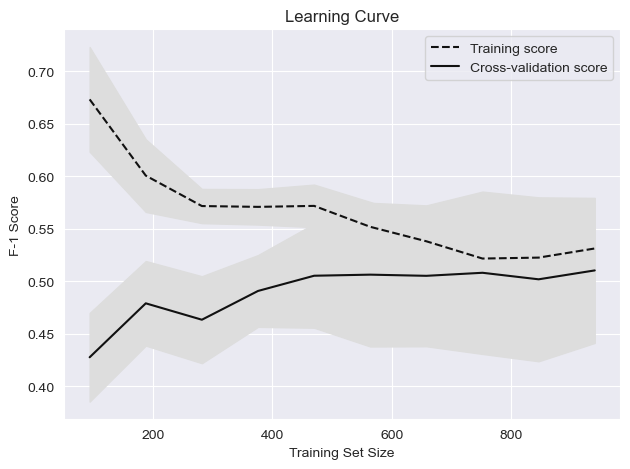

In [16]:
from projectpreprocessing import plot_learning_curves
# Initialize the model with best parameters
best_logistic_regression_model = LogisticRegression(C=0.1, solver='liblinear', class_weight='balanced')
# Function to plot learning curves
plot_learning_curves(best_logistic_regression_model, X, y, kfold)

The graph demonstrates:



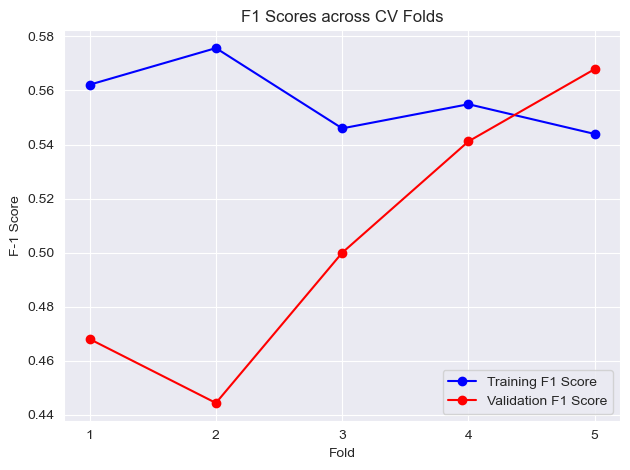

In [17]:
from projectpreprocessing import plot_foldwise_scores
plot_foldwise_scores(best_logistic_regression_model, X_train, y_train, kfold)

The graph demonstrates:




### 2.1.4 Precision vs Recall Curve (PR)

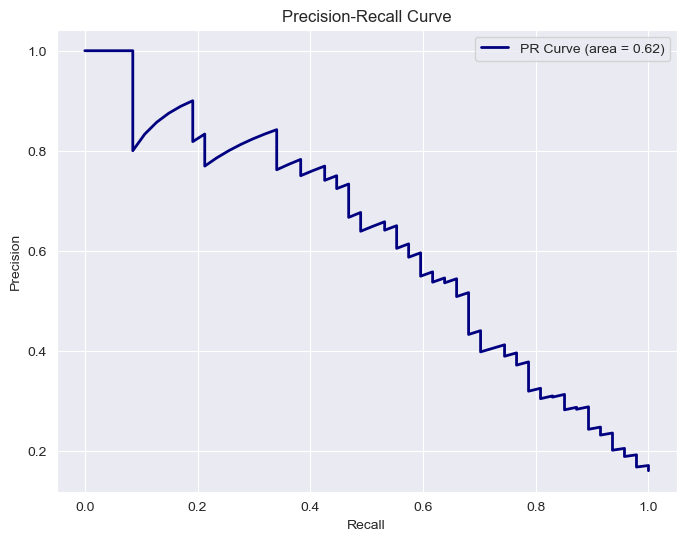

In [18]:
from projectpreprocessing import plot_precision_recall_curve

plot_precision_recall_curve(best_logistic_regression_model, X, y)

The graph demonstrates:




### 2.1.5 Interpret the Model Metric and performance

In [19]:
# Initialize the model with best parameters
best_logistic_regression_model = LogisticRegression(C=0.1, solver='liblinear', class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)
# Train the model
best_logistic_regression_model.fit(X_train, y_train)
# Get the prediction
y_pred = best_logistic_regression_model.predict(X_test)

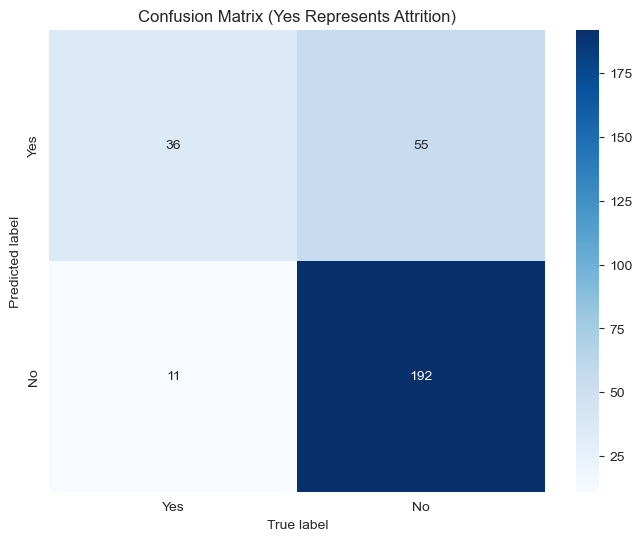

In [20]:
from projectpreprocessing import plot_confusion_matrix
# TP FP
# FN TN
# recall = TP/ TP + FN
# Attrition represents Positive
plot_confusion_matrix(y_test, y_pred) 

In [21]:
from sklearn.metrics import classification_report
# Print classification report for test data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.78      0.85       247
         1.0       0.40      0.77      0.52        47

    accuracy                           0.78       294
   macro avg       0.67      0.77      0.69       294
weighted avg       0.86      0.78      0.80       294


In [22]:
# Print classification report for training data
y_pred_train = best_logistic_regression_model.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.95      0.78      0.85       986
         1.0       0.40      0.77      0.53       190

    accuracy                           0.78      1176
   macro avg       0.67      0.77      0.69      1176
weighted avg       0.86      0.78      0.80      1176


## 2.2.0 SVM

### 2.2.1 Create the naive SVM model

In [23]:
from sklearn.svm import SVC

# Separate features and target variable
X = df_scaled.drop('Attrition_Yes', axis=1)  # Assuming all other columns are features
y = df_scaled['Attrition_Yes'].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

# model
naive_svm_model = SVC() 
naive_svm_model.fit(X_train, y_train)

# Predictions on training set for f-1 calculation
y_train_pred = naive_svm_model.predict(X_train)

# Get the prediction
y_test_pred = naive_svm_model.predict(X_test)

# Calculate f-1 score for both training and testing sets
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

f1_train, f1_test

(0.46774193548387094, 0.3157894736842105)

### 2.2.2 Use Cross Validation & Grid Search to find the best parameter

In [24]:
# Stratified train-test split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

# Setting up the k-fold cross-validation (with StratifiedKFold for balanced splits)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=66)

# Defining the SVM model
svm = SVC(random_state=66)

# Defining the grid of parameters to search over
param_grid = {
    'C': [i / 100 for i in range(100, 501)],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

# Setting up the grid search with SVM, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(svm, param_grid, cv=kfold, scoring='f1', n_jobs=-1) 

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
best_params_svm = grid_search.best_params_

# Best score achieved during cross-validation
best_score_svm = grid_search.best_score_

# Predicting the test set results with the best estimator
y_pred = grid_search.predict(X_test)

# Calculating the f-1 of the best estimator on the test set
test_f1_svm = f1_score(y_test, y_pred)

In [25]:
print(f"Best Parameters: {best_params_svm}")
print(f"Best Cross-Validation f-1 Score: {best_score_svm:.4f}")
print(f"Test Set f-1 Score: {test_f1_svm:.4f}")

Best Parameters: {'C': 1.1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation f-1 Score: 0.5274
Test Set f-1 Score: 0.5038


### 2.2.3 Learning Curves

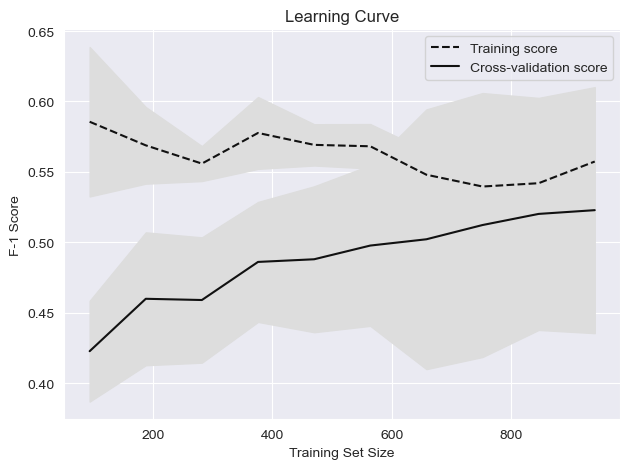

In [26]:
# Initialize the model with best parameters
best_SVM_model = SVC(C=1.1, kernel='rbf', gamma= 'auto', class_weight="balanced")
# Function to plot learning curves
plot_learning_curves(best_SVM_model, X, y, kfold) # Split the data in the function

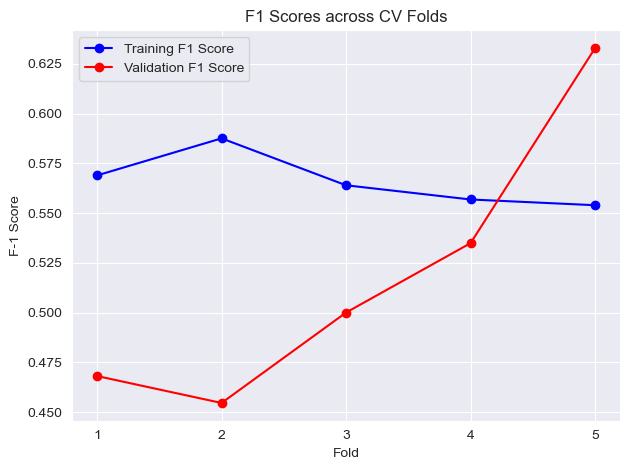

In [27]:
from projectpreprocessing import plot_foldwise_scores
plot_foldwise_scores(best_SVM_model, X_train, y_train, kfold)

### 2.2.4 Precision vs Recall Curve

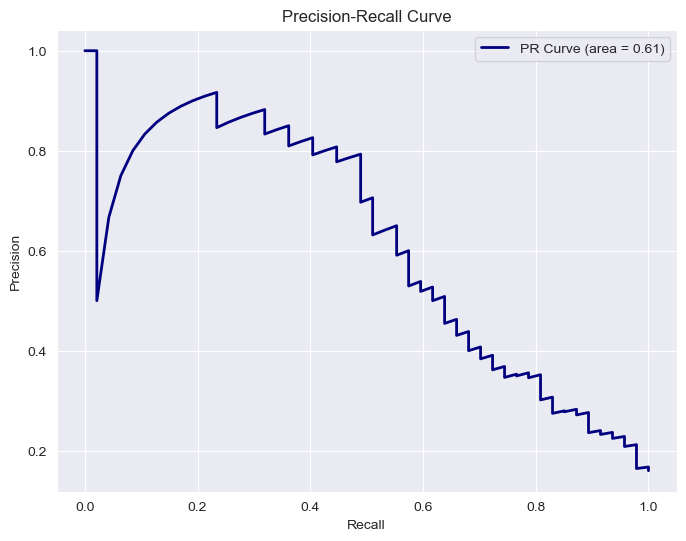

In [28]:
plot_precision_recall_curve(best_SVM_model, X, y)

### 2.2.5 Interpret the Model Metric and performance

In [29]:
# Initialize the model with best parameters
best_SVM_model = SVC(C=1.1, kernel='rbf', gamma= 'auto', class_weight="balanced")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

# Train the model
best_SVM_model.fit(X_train, y_train)
# Get the prediction
y_pred = best_SVM_model.predict(X_test)

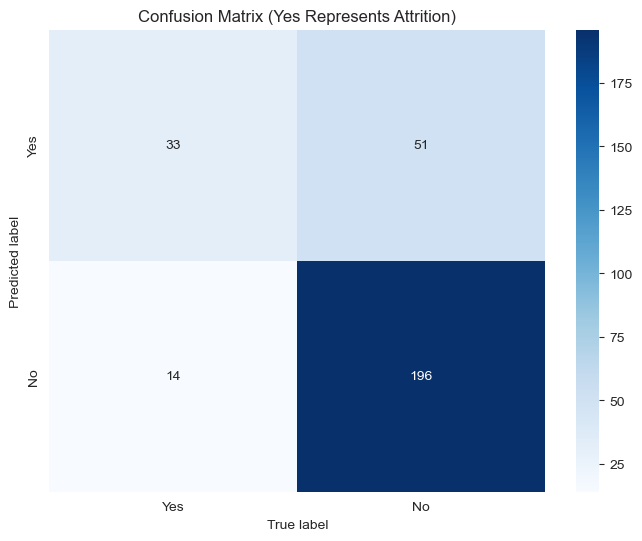

In [30]:
plot_confusion_matrix(y_test, y_pred) 

In [31]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       247
           1       0.39      0.70      0.50        47

    accuracy                           0.78       294
   macro avg       0.66      0.75      0.68       294
weighted avg       0.85      0.78      0.80       294


In [32]:
# Print classification report for training data
y_pred_train = best_SVM_model.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       986
           1       0.44      0.78      0.56       190

    accuracy                           0.80      1176
   macro avg       0.69      0.79      0.72      1176
weighted avg       0.87      0.80      0.82      1176


## 2.3.0 Random Forest

### 2.3.1 Create naive random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into training and testing sets
X = df_scaled.drop('Attrition_Yes', axis=1)
y = df_scaled['Attrition_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify= y)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=66)  # You can adjust parameters

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions on training set for f-1 calculation
y_train_pred = rf_classifier.predict(X_train)

# Get the prediction
y_test_pred = rf_classifier.predict(X_test)

# Calculate f-1 score for both training and testing sets #TP/TP+FN
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

f1_train, f1_test

(1.0, 0.14545454545454545)

### 2.3.2 Use Cross Validation & Grid Search to find the best parameter

Carefully!!! The Grid Search tries 5000 interations in total, and it took 3 mins to finish with 24 cores cpu. If you don't have enough cores , don't run it again !!!

In [34]:
# Stratified train-test split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

# Setting up the k-fold cross-validation (with StratifiedKFold for balanced splits)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=66)

# Defining the Random Forest model
rf = RandomForestClassifier(random_state=66)

# Define the parameter distribution for Random Search
param_distributions_rf = {
    'max_depth': [i for i in range (5, 31, 1)],
    'min_samples_split': [i for i in range(2, 100, 1)],
    'min_samples_leaf': [i for i in range(2, 100, 1)],
    'max_leaf_nodes': [i for i in range(2, 101, 1)],
    'class_weight': ["balanced", None]
}

# Setup Randomized Search with specified iterations
random_search_rf = RandomizedSearchCV(rf, param_distributions_rf, n_iter=5000, cv=kfold, scoring='f1', n_jobs=-1, random_state=66)

# Fit Randomized Search to the data
random_search_rf.fit(X_train, y_train)

# Best parameters, score, and estimator found by Randomized Search
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_
best_estimator_rf = random_search_rf.best_estimator_

# Predicting the test set results with the best estimator
y_pred_rf = best_estimator_rf.predict(X_test)

# Calculating the f-1 of the best estimator on the test set
test_f1_rf = f1_score(y_test, y_pred_rf)

In [35]:
print(f"Best Parameters: {best_params_rf}")
print(f"Best Cross-Validation f-1 Score: {best_score_rf:.4f}")
print(f"Test Set f-1 Score: {test_f1_rf:.4f}")

Best Parameters: {'min_samples_split': 30, 'min_samples_leaf': 4, 'max_leaf_nodes': 93, 'max_depth': 27, 'class_weight': 'balanced'}
Best Cross-Validation f-1 Score: 0.5091
Test Set f-1 Score: 0.6118


### 2.3.3 Learning Curves

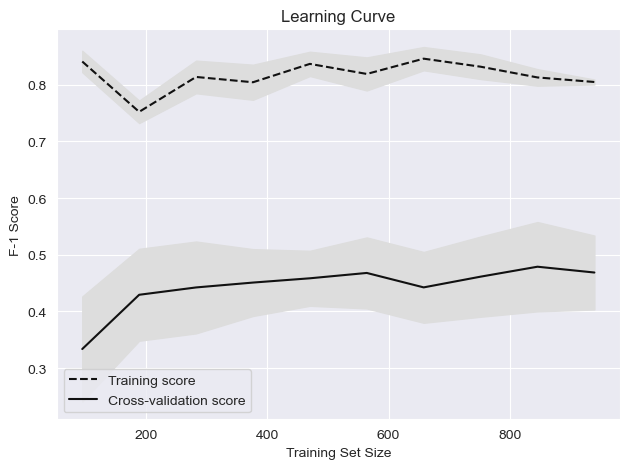

In [36]:
# Initialize the model with best parameters
best_rf_model = RandomForestClassifier(max_depth= 27, max_leaf_nodes = 93, min_samples_leaf= 4, min_samples_split= 30, class_weight= "balanced", n_estimators=500)
# Function to plot learning curves
plot_learning_curves(best_rf_model, X, y, kfold)

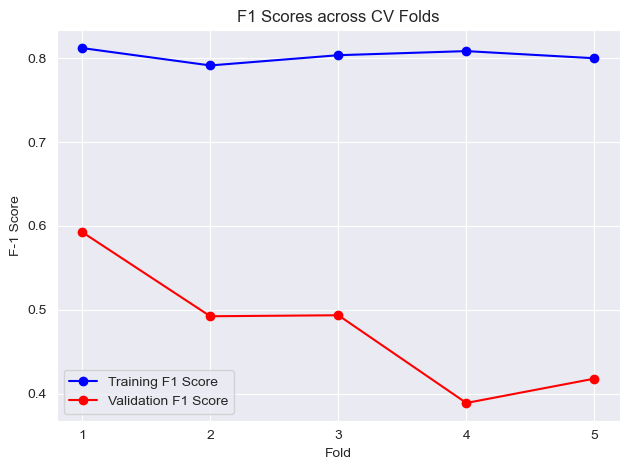

In [37]:
plot_foldwise_scores(best_rf_model, X, y, kfold)

### 2.3.4 Precision vs Recall Curve

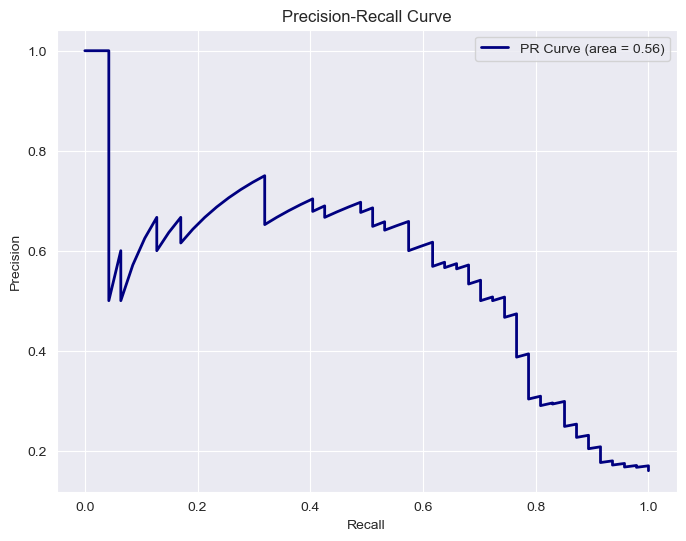

In [38]:
plot_precision_recall_curve(best_rf_model, X, y)

### 2.3.5 Interpret the Model Metric and performance

In [39]:
# Initialize the model with best parameters
best_rf_model = RandomForestClassifier(max_depth= 27, max_leaf_nodes = 93, min_samples_leaf= 4, min_samples_split= 30, class_weight= "balanced", n_estimators=500)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

# Train the model
best_rf_model.fit(X_train, y_train)
# Get the prediction
y_pred = best_rf_model.predict(X_test)

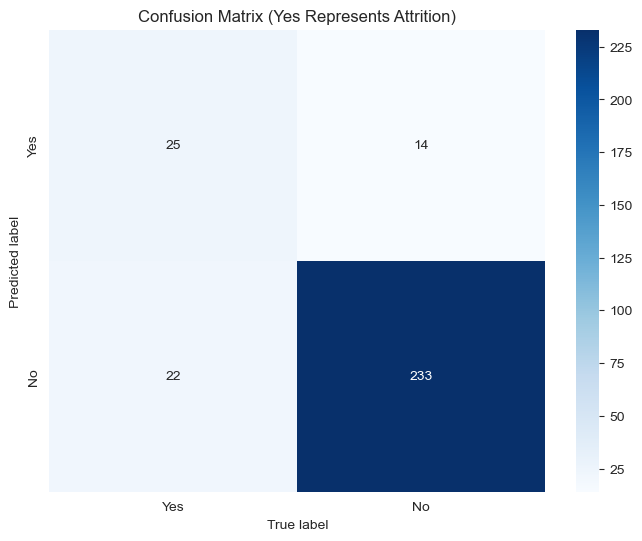

In [40]:
plot_confusion_matrix(y_test, y_pred) 

In [41]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       247
         1.0       0.64      0.53      0.58        47

    accuracy                           0.88       294
   macro avg       0.78      0.74      0.75       294
weighted avg       0.87      0.88      0.87       294


In [42]:
# Print classification report for training data
y_pred_train = best_rf_model.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       986
         1.0       0.76      0.88      0.81       190

    accuracy                           0.94      1176
   macro avg       0.87      0.91      0.89      1176
weighted avg       0.94      0.94      0.94      1176


### 2.3.6 Check Feature Importance

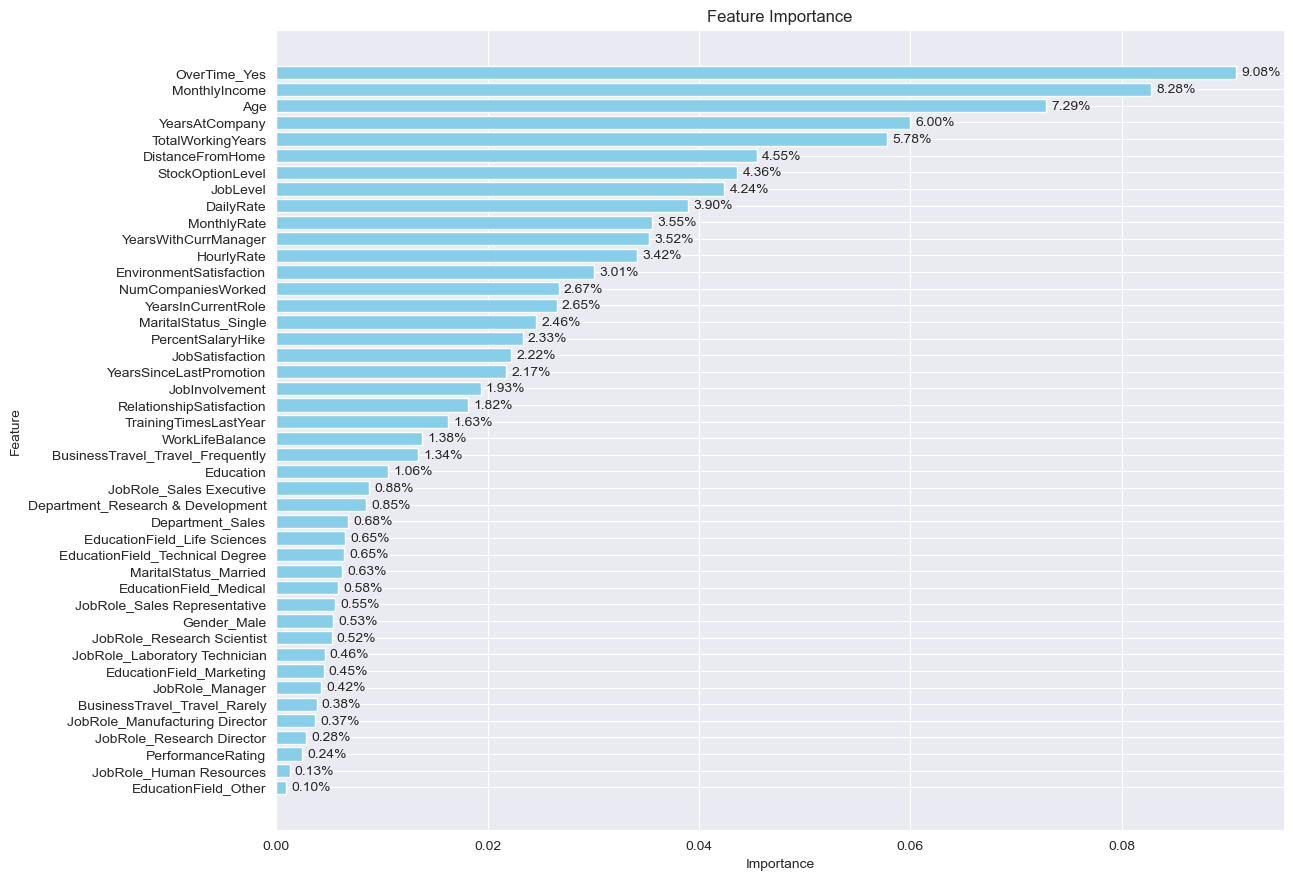

In [43]:
from projectpreprocessing import plot_random_forest_feature_importance
plot_random_forest_feature_importance(best_rf_model, X, y)

## 2.4.0 Ensemble Method

### 2.4.1 Initialize the previously best models

In [45]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
# Separate features and target variable
X = df_scaled.drop('Attrition_Yes', axis=1)  # Assuming all other columns are features
y = df_scaled['Attrition_Yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify= y)


best_logistic_regression_model = LogisticRegression(C=0.1, solver='liblinear', class_weight='balanced')
best_SVM_model = SVC(C=1.1, kernel='rbf', gamma= 'auto', class_weight="balanced", probability= True)
best_rf_model = RandomForestClassifier(max_depth= 27, max_leaf_nodes = 93, min_samples_leaf= 4, min_samples_split= 30, class_weight= "balanced", n_estimators=500)

### 2.4.2 Create a naive ensemble model

In [46]:
ensemble_model = VotingClassifier(estimators=[
    ('logistic', best_logistic_regression_model),
    ('svm', best_SVM_model),
    ('randomforest',best_rf_model)
])

# Train the model
ensemble_model.fit(X_train, y_train)

# Predictions on training set for f-1 calculation
y_train_pred = ensemble_model.predict(X_train)

# Get the prediction
y_test_pred = ensemble_model.predict(X_test)

# Calculate f-1 score for both training and testing sets #TP/TP+FN
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

f1_train, f1_test

(0.573055028462998, 0.523076923076923)

### 2.4.3 Use Cross Validation & Grid Search to find the best parameter

In [47]:
param_grid = {
    'weights': [
        [0.33, 0.33, 0.34],  # Evenly distributed weights
        [0.25, 0.25, 0.5],   # More weight on random forest
        [0.5, 0.25, 0.25],   # More weight on logistic regression
        [0.25, 0.5, 0.25],   # More weight on SVM
    ], 'voting':["hard", "soft"]
}

# Setting up the k-fold cross-validation (with StratifiedKFold for balanced splits)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=66)

# Initialize GridSearchCV
grid_search_ensemble = GridSearchCV(estimator=ensemble_model, param_grid=param_grid, scoring="f1", cv=kfold, n_jobs=-1)  

# Fitting the grid search to the data
grid_search_ensemble.fit(X_train, y_train)

# Best parameters found
best_params_ensemble = grid_search_ensemble.best_params_

# Best score achieved during cross-validation
best_score_ensemble = grid_search_ensemble.best_score_

# Predicting the test set results with the best estimator
y_pred_ensemble = grid_search_ensemble.predict(X_test)

# Calculating the f-1 of the best estimator on the test set
test_f1_ensemble = f1_score(y_test, y_pred_ensemble)

In [48]:
print(f"Best Parameters: {best_params_ensemble}")
print(f"Best Cross-Validation f-1 Score: {best_score_ensemble:.4f}")
print(f"Test Set f-1 Score: {test_f1_ensemble:.4f}")

Best Parameters: {'voting': 'soft', 'weights': [0.5, 0.25, 0.25]}
Best Cross-Validation f-1 Score: 0.5742
Test Set f-1 Score: 0.6186


### 2.4.4 Learning Curves

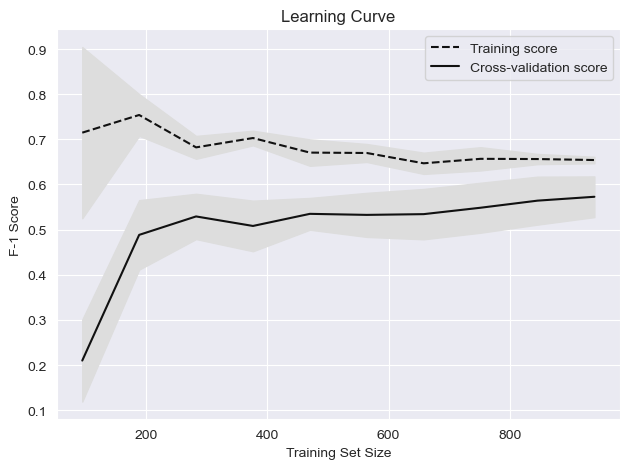

In [49]:
best_ensemble_model = VotingClassifier(estimators=[
    ('logistic', best_logistic_regression_model),
    ('svm', best_SVM_model),
    ('randomforest',best_rf_model)],
    voting= "soft",weights=[0.5, 0.25, 0.25], n_jobs=-1)
# Function to plot learning curves
plot_learning_curves(best_ensemble_model, X, y, kfold)

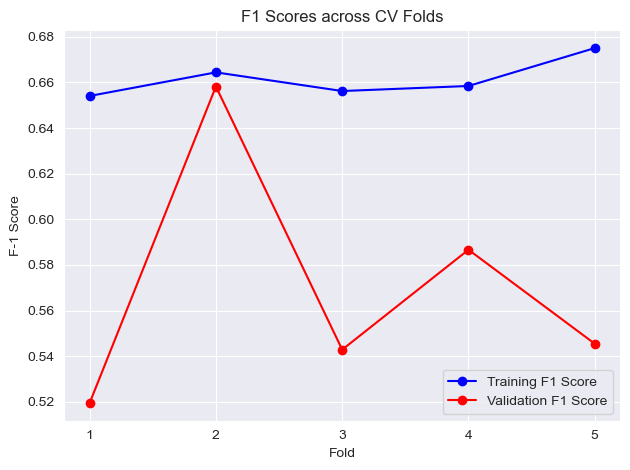

In [50]:
plot_foldwise_scores(best_ensemble_model,X, y, kfold)

### 2.4.5 Precision vs Recall Curve

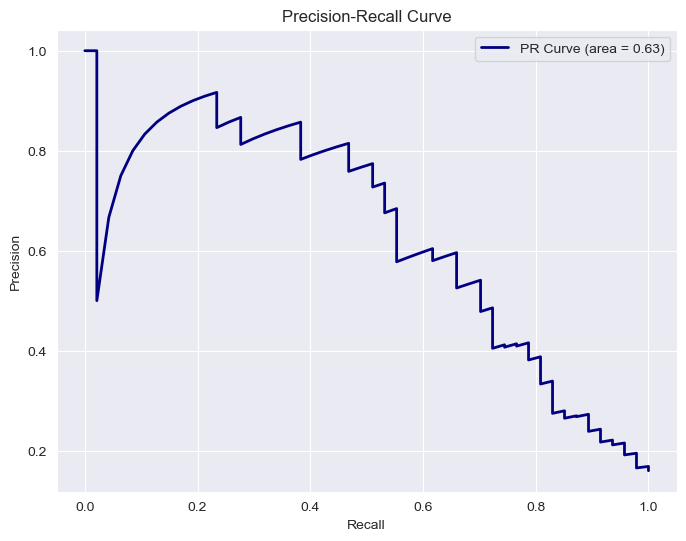

In [51]:
plot_precision_recall_curve(best_ensemble_model, X, y)

### 2.4.6 Interpret the Model Metric and performance

In [52]:
best_ensemble_model = VotingClassifier(estimators=[
    ('logistic', best_logistic_regression_model),
    ('svm', best_SVM_model),
    ('randomforest',best_rf_model)],
    voting= "soft",weights=[0.5, 0.25, 0.25], n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

# Train the model
best_ensemble_model.fit(X_train, y_train)
# Get the prediction
y_pred = best_ensemble_model.predict(X_test)

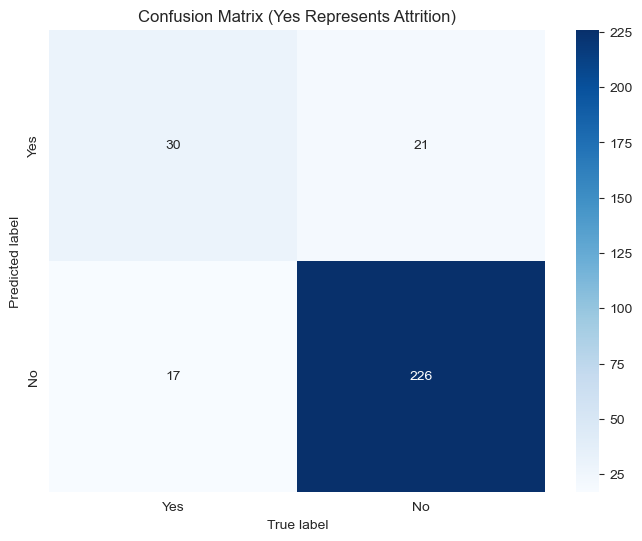

In [53]:
plot_confusion_matrix(y_test, y_pred) 

In [54]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       247
         1.0       0.59      0.64      0.61        47

    accuracy                           0.87       294
   macro avg       0.76      0.78      0.77       294
weighted avg       0.88      0.87      0.87       294


In [55]:
# Print classification report for training data
y_pred_train = best_ensemble_model.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       986
         1.0       0.63      0.70      0.66       190

    accuracy                           0.89      1176
   macro avg       0.79      0.81      0.80      1176
weighted avg       0.89      0.89      0.89      1176
